In [3]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import corner
import time 
from scipy import stats

In [5]:
#file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
file_path = "../../../LongScaleCsvs/"
planet_systems = np.loadtxt(file_path +"Order.txt", dtype = str)
print planet_systems.shape

(145,)


In [6]:
planet_systems=["Sys_67_1e8.csv", "Sys_3898_1e8.csv", "Sys_24930_1e8.csv", "Sys_8744_1e8.csv", "Sys_4641_1e8.csv"]

In [7]:
info = pd.read_csv("../../Figures/MCMCFigures/Weibull_MCMC_Params_145.csv", index_col = 0)
info = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_145.csv", index_col =0 )
info.tail()

,ID,Gamma,Location,Alpha
140,8462.0,2.096314,4.459373,1.199551e+00
141,8582.0,0.184163,1.996260,1.191003e+00
142,8744.0,0.833252,4.705257,1.546389e-01
143,91.0,1.634222,4.750447,8.097842e-01
144,99.0,0.999930,7.983125,8.810369e-16


In [10]:
def plot_hists( planet_systems,title=None):
    #try making more coherent plots
    ncol, nrow = 3,len(planet_systems)//3 +1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    #axarr[0].histogram
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv(file_path+planet_sys, index_col = 0)
        #print planet_sys, data.shape

        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        gamma, mean, alpha =  info[info["ID"]==int(name)][["Gamma","Location", "Alpha"]].values[0]
        print gamma, mean, alpha
        x = np.linspace(data["logt"].min(), data["logt"].max(), 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=mean,scale = alpha)
        axarr[jj//ncol, jj%ncol ].plot(x, vals, linewidth = 4, color = "black")
        #color = graph[-1].get_color()
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name, alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        #create gaussian on top 
        axarr[jj//ncol, jj%ncol ].set_title(name)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        #print edges
        #if edges[1] > 2:
        #    print edges
        #    axarr[jj//ncol, jj%ncol ].set_ylim([0,min(3.5, edges[1])])
        #if name == "4641":
        #    axarr[jj//ncol, jj%ncol ].set_ylim([0,8])
    plt.show()
    if title == None:
        plt.close(fig)
    else:
        fig.savefig("../../Figures/MCMCFigures/"+title, bbox_extent = "tight")
    #plt.close(fig)


6.23880309485 5.98353793445 1.61786872449
2.1366947807 3.45742534251 2.25467683301
0.79464514112 4.66478974305 0.461983076594
(0.0, 398.79360550873861)
0.833251932557 4.70525713081 0.154638909864
(0.0, 333.32279478350159)
0.382622581758 2.43107120855 0.14732711058
(0.0, 9.1116053496108051)


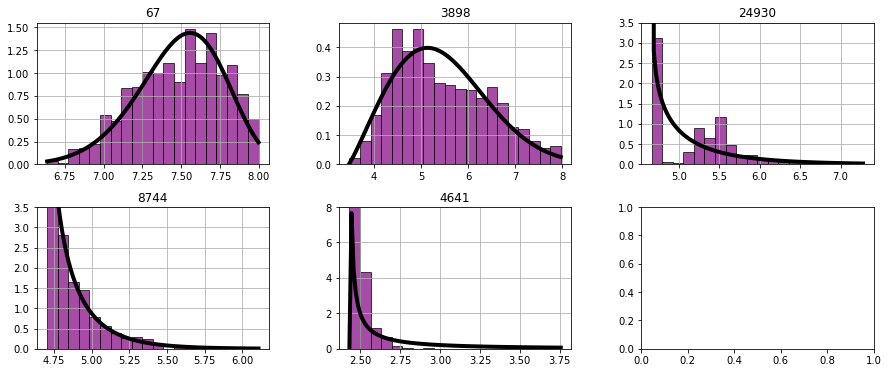

In [9]:
plot_hists(planet_systems)

(145,)
2.61402658322 4.44752697372 1.28337089098
3.26965544552 4.98914961207 1.12966408388
2.24990562863 4.96533664956 0.938566234022
1.8569302557 4.86343946028 0.972276542167
1.5966935984 5.78111149767 0.761953477338
3.56837236699 3.97100579655 1.3526951266
1.70006613045 4.97452204194 0.805958723139
3.06695012224 3.84985941855 1.29030022806
1.13011039112 3.18219310829 0.816436566831
2.37628562072 3.72235967285 1.69326011838
3.75004199969 3.98713243839 1.22856292807
2.08340344253 3.57285462827 1.44448000818
1.69911814183 4.75536484284 1.57820926879
2.54702721747 4.28144554375 0.979274503073
3.37695706265 4.51093002751 0.831569944396
2.25585292199 4.27475426843 1.17655267558
1.56047242631 4.30197654973 1.51735514577
2.65270242745 4.22105669804 0.978819846003
3.21111918472 4.4324231576 1.16624095452
2.64400431445 3.39776357243 1.05135392281
7.16871411155 3.00117014259 4.06312750863
1.49381234419 3.78694549942 0.815885917394
3.01939511396 3.81699829462 1.29851501136
2.7600829392 4.2834037

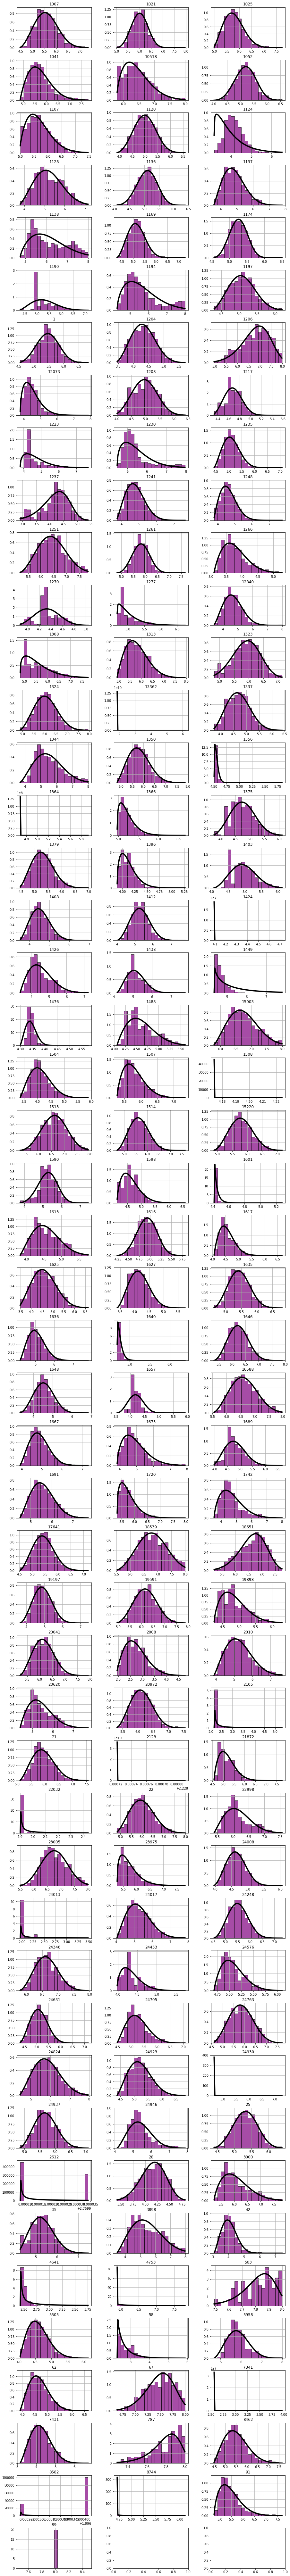

In [11]:
#try with systems in the middle to see if they are any more gaussian
#file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)

print planet_systems.shape
plot_hists( planet_systems, "All_weibull_145.png")


[ 12073.   1277.   1308.  13362.   1337.   1356.   1364.   1396.   1424.
   1449.   1508.   1601.   1617.   1640.   2105.   2128.  22032.  23975.
  24013.  24930.   4641.   4753.     58.   7341.   8744.     91.]
1.49381234419 3.78694549942 0.815885917394
1.11667536563 4.67411357132 0.392666618489
1.2708278709 4.8087230497 0.843519771276
0.0586211711286 1.87403217406 0.422754688861
2.59411513227 3.64289930112 1.19610855591
1.29881223833 4.50691427887 0.0537789135472
0.278281876623 4.68683319613 0.0864509926747
1.42390214302 3.89610737334 0.253630361089
0.356003599617 4.0917098157 1.25544125607
0.856103438371 4.34778534259 0.945716956372
0.748105405245 4.1739215789 0.00262561485307
0.890051299254 4.41661187566 0.0336347750484
1.83746608541 4.05991912473 0.565690901852
1.14350054773 4.69323253344 0.0819892754916
0.240014879685 2.15480389824 0.43941108944
0.0603410226057 2.22872177159 6.01120015524e-05
0.345480849508 1.89979801341 0.0479413884444
1.34705778875 5.27926350562 0.507055437651


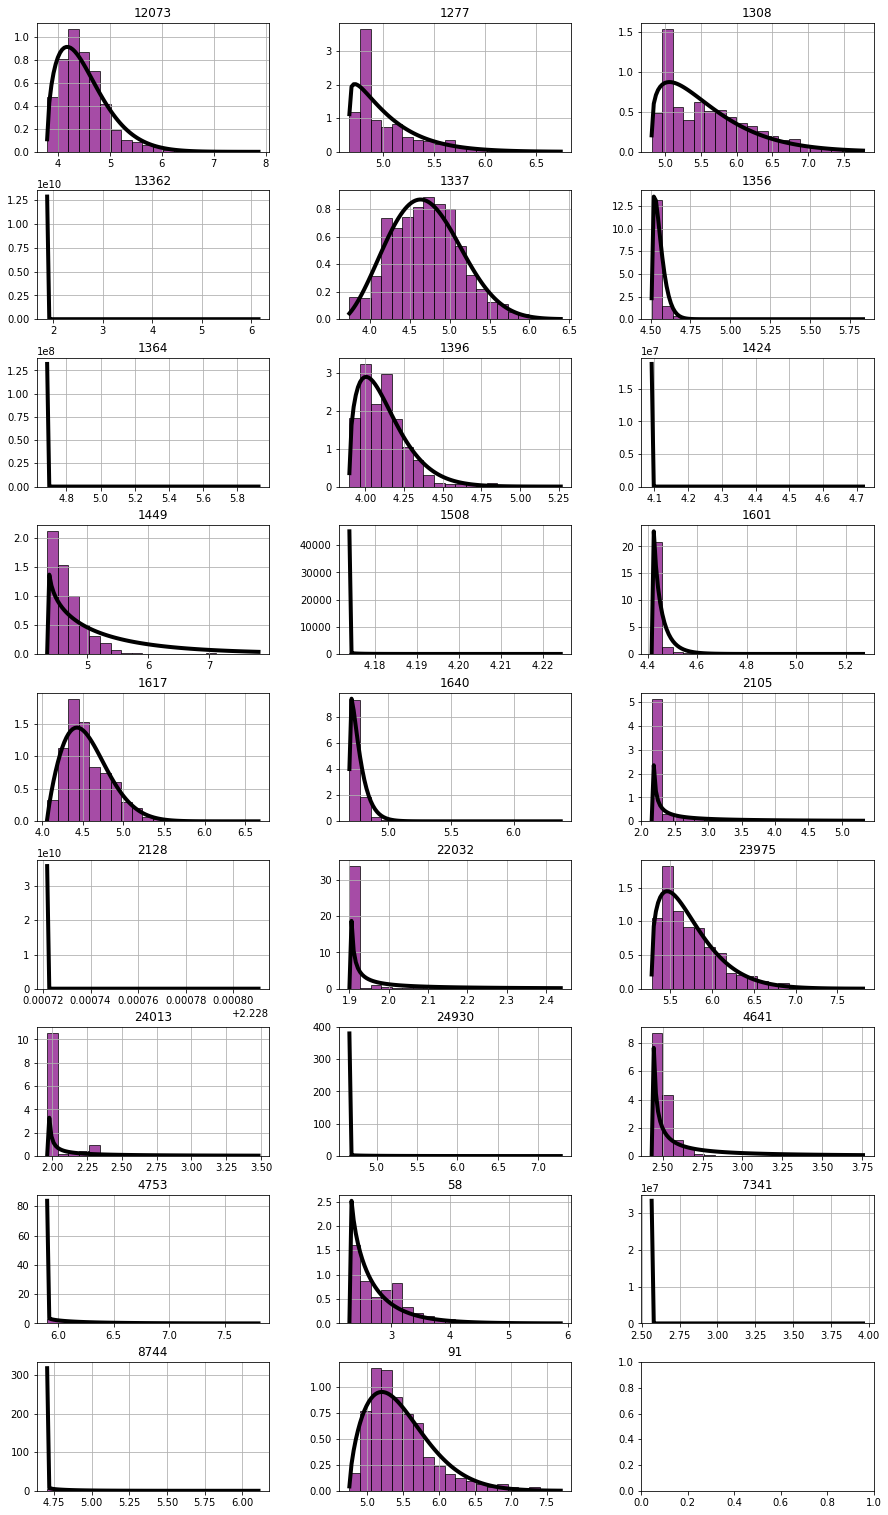

In [17]:
good_data = info[(info["Location"]>2.8)]
good_data_ids = good_data["ID"].astype(int).values.astype(str)
good_data_ids = np.loadtxt("../../../ExpDists.txt")
print good_data_ids
planet_systems = ["Sys_"+str(int(x))+"_1e8.csv" for x in good_data_ids]
#planet_systems, len(planet_systems)
#print len(planet_systems)
plot_hists(planet_systems)
#print good_data.shape

In [16]:
def plot_hists( planet_systems,title=None):
    #try making more coherent plots
    ncol, nrow = 3,len(planet_systems)//3 +1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    #axarr[0].histogram
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
        #print planet_sys, data.shape

        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        gamma, mean, alpha =  info[info["ID"]==int(name)][["Gamma","Location", "Alpha"]].values[0]

        x = np.linspace(data["logt"].min(), data["logt"].max(), 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=mean,scale = alpha)
        axarr[jj//ncol, jj%ncol ].plot(x, vals, linewidth = 2, color = "black")
        #color = graph[-1].get_color()
        label_string = name + r': $\gamma$='  + "{0:.3}".format(gamma) + r': $\mu$='  + "{0:.3}".format(mean) + r': $\alpha$='  + "{0:.3}".format(alpha)
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        #create gaussian on top 
        axarr[jj//ncol, jj%ncol ].set_title(label_string)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        #print edges
        if edges[1] > 2:
            print edges
            axarr[jj//ncol, jj%ncol ].set_ylim([0,min(3.5, edges[1])])
        if name == "4641":
            axarr[jj//ncol, jj%ncol ].set_ylim([0,8])


    plt.show()
    if title == None:
        plt.close(fig)
    else:
        fig.savefig("../Figures/MCMCFigures/"+title, bbox_extent = "tight")
    #plt.close(fig)
#print planet_systems.shape


(53,)
(0.0, 13540321744.018196)
(0.0, 5.3974304328838851)
(0.0, 37680884411.343384)
(0.0, 35.493998177926365)
(0.0, 11.039102560571516)
(0.0, 3.0999201843903972)
(0.0, 2.3556589646678887)
(0.0, 398.79360550873861)
(0.0, 475430.57299804158)
(0.0, 9.1116053496108051)
(0.0, 87.964614626058676)
(0.0, 34958378.123999506)
(0.0, 105886.82081607971)
(0.0, 333.32279478350159)


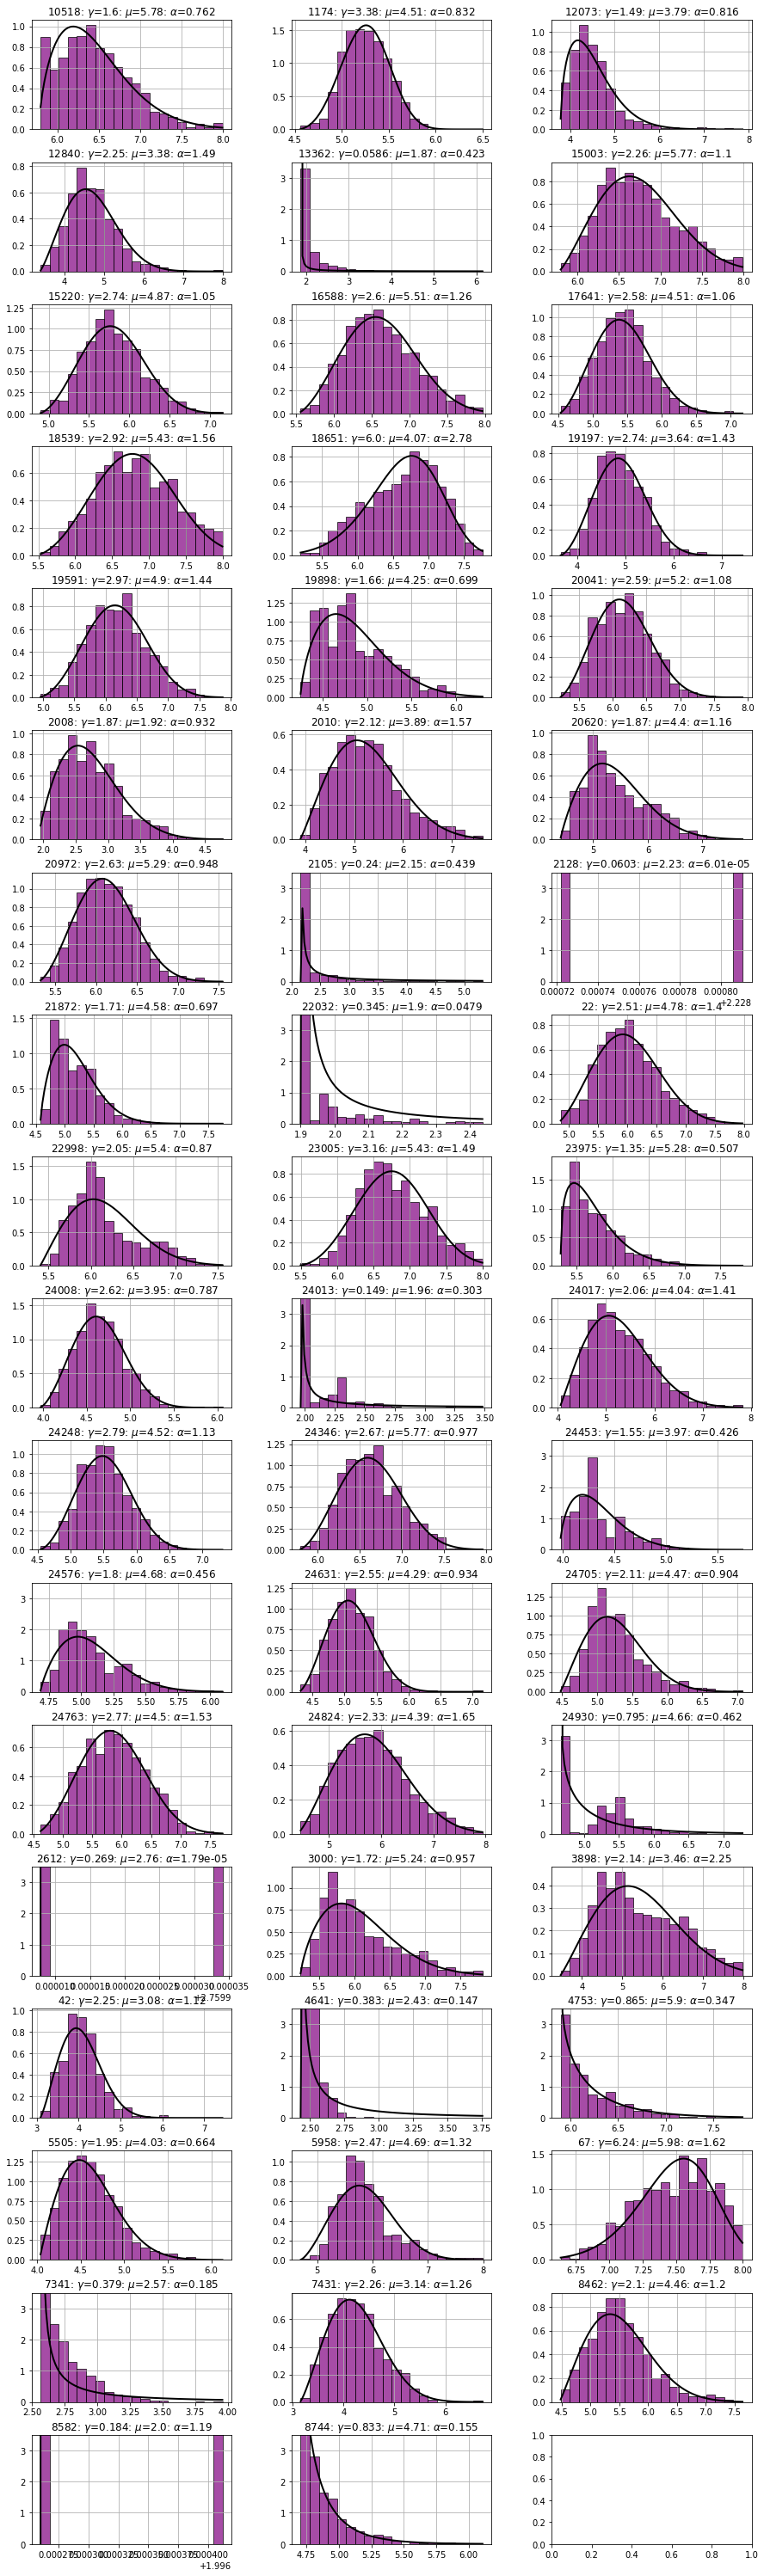

In [9]:
plot_hists(planet_systems[:],"WeibullAllHists.png" )

(0.0, 398.79360550873861)
(0.0, 333.32279478350159)
(0.0, 9.1116053496108051)


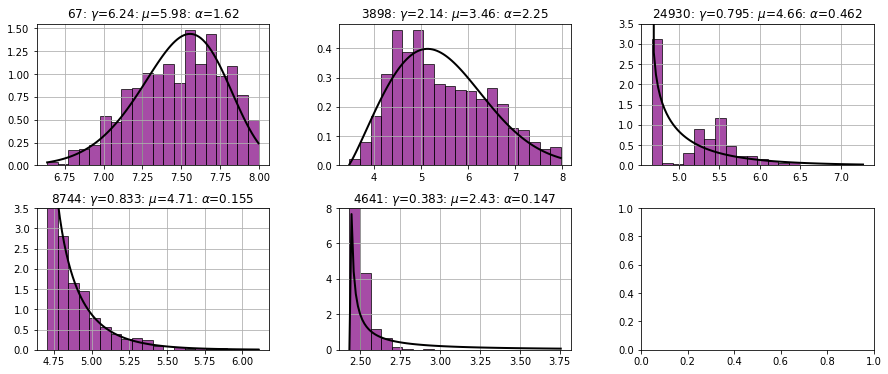

In [17]:
planet_systems=["Sys_67_1e8.csv", "Sys_3898_1e8.csv", "Sys_24930_1e8.csv", "Sys_8744_1e8.csv", "Sys_4641_1e8.csv"]
plot_hists(planet_systems[:],"Individual_5_Weibull_Fits.png" )

        ID     Gamma  Location     Alpha
52  8744.0  0.833252  4.705257  0.154639 [  8.74400000e+03   8.33251933e-01   4.70525713e+00   1.54638910e-01]


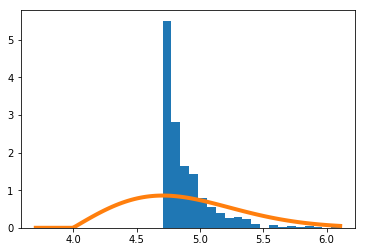

In [10]:
ind = 8744

file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/Sys_"+str(ind)+"_1e8.csv"
print info[info["ID"] == ind], info[info["ID"] == ind].values[0]
gamma, loc, alpha = info[info["ID"] == ind].values[0][1:]
weird_data = pd.read_csv(file_path, index_col=0)
times = np.log10(weird_data["t"])
#print times
x = np.linspace(times.min()-1, times.max(), 100)
gamma, loc, alpha = 2, 4, 1
vals = stats.weibull_min.pdf(x,c=gamma,loc=loc,scale = alpha)
plt.hist(times, normed  =1, bins = 20)
plt.plot(x, vals, linewidth = 4)
plt.show()


In [17]:
"{0:.4f}".format(31214.41)


'31214.4100'

In [11]:
params_range = np.max(info[["Gamma", "Location","Alpha"]]) - np.min(info[["Gamma", "Location","Alpha"]])
print np.max(info[["Gamma", "Location","Alpha"]]).values , np.min(info[["Gamma", "Location","Alpha"]]).values
print params_range

[ 6.23880309  5.98353793  2.77670855] [  5.86211711e-02   1.87403217e+00   1.78939094e-05]
Gamma       6.180182
Location    4.109506
Alpha       2.776691
dtype: float64


In [51]:
#calculate probability of data with the fitted parameters
# work with one for now 
file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)
test_set = pd.read_csv(file_path+planet_systems[0], index_col = 0)
test_data = np.log10(test_set["t"])#.head()
print planet_systems[0]
info.head(1)

Sys_10518_1e8.csv


,ID,Gamma,Location,Alpha
0,10518.0,1.596694,5.781111,0.761953


In [52]:
def calc_prob(data, vals):
    gamma, mu, alpha = vals
    #normalize it by the number of samples, similar to how it was done for the gaussian distribution
    probs = np.log(gamma/alpha) + (gamma -1)/data.shape[0]* np.nansum(np.log((data-mu)/alpha)) - np.nansum(((data-mu)/alpha)**gamma)/data.shape[0]
    return probs

probability_table = np.zeros(info.shape[0])

for i in range(int(info.shape[0])):
    score =calc_prob(test_data, info.loc[i].values[1:]) 
    print planet_systems[i], np.exp(score)
    probability_table[i] = np.exp(score)

Sys_10518_1e8.csv 0.60170133823
Sys_1174_1e8.csv 5.28613899042e-09
Sys_12073_1e8.csv 0.00811804496313
Sys_12840_1e8.csv 0.0183364457357
Sys_13362_1e8.csv 0.00465890249301
Sys_15003_1e8.csv 0.470045334508
Sys_15220_1e8.csv 0.115292875278
Sys_16588_1e8.csv 0.540538635138
Sys_17641_1e8.csv 0.0264604476332
Sys_18539_1e8.csv 0.450857963175
Sys_18651_1e8.csv 0.472133110001
Sys_19197_1e8.csv 0.00600461224017
Sys_19591_1e8.csv 0.440426409419
Sys_19898_1e8.csv 0.00469545806696
Sys_20041_1e8.csv 0.408010979165
Sys_2008_1e8.csv 2.42315857469e-08
Sys_2010_1e8.csv 0.119123299713
Sys_20620_1e8.csv 0.117731011535
Sys_20972_1e8.csv 0.327638039671
Sys_2105_1e8.csv 0.0171207324422
Sys_2128_1e8.csv 0.00394068997069
Sys_21872_1e8.csv 0.0158347780285
Sys_22032_1e8.csv 0.00293400320497
Sys_22_1e8.csv 0.361627042661
Sys_22998_1e8.csv 0.429823001692
Sys_23005_1e8.csv 0.463035885778
Sys_23975_1e8.csv 0.131279799593
Sys_24008_1e8.csv 3.23124218645e-09
Sys_24013_1e8.csv 0.0111405149866
Sys_24017_1e8.csv 0.104030

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [53]:
probability_table

array([  6.01701338e-01,   5.28613899e-09,   8.11804496e-03,
         1.83364457e-02,   4.65890249e-03,   4.70045335e-01,
         1.15292875e-01,   5.40538635e-01,   2.64604476e-02,
         4.50857963e-01,   4.72133110e-01,   6.00461224e-03,
         4.40426409e-01,   4.69545807e-03,   4.08010979e-01,
         2.42315857e-08,   1.19123300e-01,   1.17731012e-01,
         3.27638040e-01,   1.71207324e-02,   3.94068997e-03,
         1.58347780e-02,   2.93400320e-03,   3.61627043e-01,
         4.29823002e-01,   4.63035886e-01,   1.31279800e-01,
         3.23124219e-09,   1.11405150e-02,   1.04030529e-01,
         3.21732390e-02,   4.45817336e-01,   1.49899465e-06,
         5.53691853e-05,   6.82038603e-04,   1.88493236e-02,
         2.75583396e-01,   2.93954367e-01,   6.85342389e-02,
         4.56053114e-12,   3.86160266e-01,   1.92059936e-01,
         2.95233160e-05,   9.71332022e-03,   5.50831860e-01,
         2.09283593e-05,   2.63452971e-01,   7.34017483e-03,
         1.29232577e-02,

In [55]:
print info.columns.values
info["Probability"] = probability_table
print info.columns.values

['ID' 'Gamma' 'Location' 'Alpha']
['ID' 'Gamma' 'Location' 'Alpha' 'Probability']


In [58]:
info.to_csv("../Figures/MCMCFigures/Weibull_Probabilities.csv")
info

,ID,Gamma,Location,Alpha,Probability
0,10518.0,1.596694,5.781111,0.761953,6.017013e-01
1,1174.0,3.376957,4.510930,0.831570,5.286139e-09
2,12073.0,1.493812,3.786945,0.815886,8.118045e-03
3,12840.0,2.251988,3.382845,1.493526,1.833645e-02
4,13362.0,0.058621,1.874032,0.422755,4.658902e-03
5,15003.0,2.262662,5.773188,1.104837,4.700453e-01
6,15220.0,2.741724,4.871237,1.054846,1.152929e-01
7,16588.0,2.603845,5.507139,1.262938,5.405386e-01
8,17641.0,2.578514,4.505209,1.062608,2.646045e-02
9,18539.0,2.919823,5.426328,1.557542,4.508580e-01
